In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import csv
import random
import pandas as pd
from tqdm import tqdm
import datetime
import logging
import re
import configparser
import psycopg2
import socket
import sys

In [3]:
config = configparser.ConfigParser()
config.read('../config.ini')

# Get the database credentials
db_endpoint = config['database']['host']
db_name = config['database']['database_name']
db_user = config['database']['username']
db_password = config['database']['password']
db_port = int(config['database']['port'])

# Set the timeout for the connection attempt (in seconds)
connection_timeout = 10

try:
    # Create a socket and set a timeout for the connection attempt
    #conn_socket = socket.create_connection((db_endpoint, 5432), timeout=connection_timeout)
    
    # If the connection was successful, close the socket
    #conn_socket.close()
    
    # Now establish the database connection using psycopg2
    connection = psycopg2.connect(
        host=db_endpoint,
        port = db_port,
        database = db_name,
        user=db_user,
        password=db_password
    )
    print("Connected successfully!")
    

except (socket.timeout, psycopg2.OperationalError) as e:
    if isinstance(e, socket.timeout):
        print("Error: Connection timed out.")
    else:
        print("Error during connection:", e)
    sys.exit(1)  # Terminate the program with a non-zero exit code

Connected successfully!


In [6]:
with connection.cursor() as cursor:
    cursor.execute("SELECT * FROM tbTradingHistoric;")
    columns = [desc[0] for desc in cursor.description]
    data = cursor.fetchall()
    df_trading_historic = pd.DataFrame(data, columns=columns)

In [22]:
df_trading_historic.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Symbol
0,2023-01-03,151.960007,153.130005,148.470001,150.039993,149.510452,1414300,A
1,2023-01-04,151.649994,153.039993,150.240005,151.669998,151.134705,1247400,A
2,2023-01-05,150.000000,153.070007,148.770004,152.110001,151.573166,1714600,A
3,2023-01-06,154.360001,154.639999,143.009995,147.669998,147.148834,2445000,A
4,2023-01-09,149.690002,151.279999,147.199997,147.470001,146.949524,1269600,A


In [9]:
df_trading_historic.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume',
       'Symbol'],
      dtype='object')

In [11]:
# Resumen estadístico básico
print(df_trading_historic.describe())

                Open           High            Low          Close  \
count  943135.000000  943135.000000  943135.000000  943135.000000   
mean       36.802673      37.318264      36.309455      36.826225   
std       122.558300     123.983960     121.272416     122.685630   
min         0.000000       0.002800       0.001300       0.001600   
25%         4.380000       4.510000       4.230000       4.370000   
50%        11.350000      11.550000      11.160000      11.350000   
75%        30.990000      31.500000      30.469999      31.000000   
max      6474.529785    6474.529785    6405.000000    6466.000000   

           Adj_Close        Volume  
count  943135.000000  9.431350e+05  
mean       36.760733  1.202514e+06  
std       122.646157  6.073132e+06  
min         0.001600  0.000000e+00  
25%         4.360000  2.720000e+04  
50%        11.300000  1.698000e+05  
75%        30.910000  7.484000e+05  
max      6466.000000  1.894472e+09  


In [12]:
# Información general del DataFrame
print(df_trading_historic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943135 entries, 0 to 943134
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       943135 non-null  object 
 1   Open       943135 non-null  float64
 2   High       943135 non-null  float64
 3   Low        943135 non-null  float64
 4   Close      943135 non-null  float64
 5   Adj_Close  943135 non-null  float64
 6   Volume     943135 non-null  int64  
 7   Symbol     943135 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 57.6+ MB
None


In [13]:
# Contar valores nulos en cada columna
print(df_trading_historic.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
Symbol       0
dtype: int64


In [21]:
#Find the duplicates

duplicate_regist = df_trading_historic.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicate_regist}")

Cantidad de registros duplicados: 0


In [20]:
#Count the unique symbols in the data
unique_symbols_count = df_trading_historic['Symbol'].nunique()
print(f"Cantidad de símbolos únicos: {unique_symbols_count}")

Cantidad de símbolos únicos: 7080


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4a4167400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4a4167940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4a4167160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb4a4167e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4a40ed160>],
 'means': []}

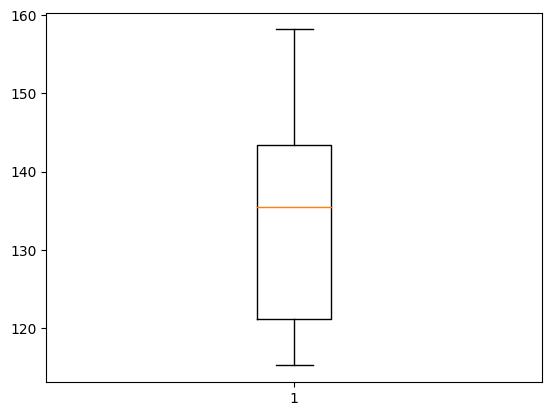

In [27]:
plt.boxplot(df_trading_historic[df_trading_historic['Symbol']=='A']['Open'])